# Importing necessary libraries

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np # For linear algebra

from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics.pairwise import cosine_similarity  # For calculating similarity between items

# Dataset Exploration


### 1. anime.csv dataset

In [2]:
anime_df = pd.read_csv("anime.csv") # reading anime.csv file

In [3]:
print("Shape of The Anime Dataset :",anime_df.shape)

Shape of The Anime Dataset : (12294, 7)


In [4]:
print("Glimpse of The Anime Dataset :\n")
anime_df.head()

Glimpse of The Anime Dataset :



,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
print("Informations About Anime Dataset:\n")
anime_df.info()

Informations About Anime Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


**Here we can see:**

1. **"anime_id" and "members"** contain all the integer values.
2. **"name", "genre", "type"**, and **"episodes"** (because some of them contain unknown episodes) contain text/object values.
3. **"rating"** contains float values.

### 2. rating.csv dataset

In [6]:
rating_df = pd.read_csv("rating.csv") # reading rating.csv file

In [7]:
print("Shape of The Rating Dataset :",rating_df.shape)

Shape of The Rating Dataset : (7813737, 3)


In [8]:
print("Glimpse of The Rating Dataset :\n")
rating_df.head()

Glimpse of The Rating Dataset :



,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [9]:
print("Informations About Rating Dataset:\n")
rating_df.info()

Informations About Rating Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


**Here we can see:**

1. **"user_id", "anime_id"** and **"rating"** contain all the integer values.

# Dataset Summary


## 1. Summary of The Anime Dataset

In [10]:
print("Summary of The Anime Dataset :\n")
anime_df.describe()

Summary of The Anime Dataset :



,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [11]:
# Print the summary of categorical (text) columns in the Anime Dataset
anime_categorical_summary = anime_df[['name', 'genre', 'type', 'episodes']].describe(include='object').T # here I used ".T" Transpose to swap rows and columns

print("Summary of The Anime Dataset (Categorical Columns):\n")
print(anime_categorical_summary)


Summary of The Anime Dataset (Categorical Columns):

          count unique                      top  freq
name      12294  12292  Shi Wan Ge Leng Xiaohua     2
genre     12232   3264                   Hentai   823
type      12269      6                       TV  3787
episodes  12294    187                        1  5677


In [12]:
print("Null Values of Anime Dataset:\n")

anime_df.isnull().sum()

Null Values of Anime Dataset:



anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

**As we can see "genre" (62), "type" (25) and "rating" (230) contains null values**

In [13]:
# Drop null values from the Anime Dataset
anime_df = anime_df.dropna()

print("After Dropping, Null Values of Anime Dataset:")
anime_df.isnull().sum()

After Dropping, Null Values of Anime Dataset:


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

**As we can see, the dataset doesn't conntains any null values now.**

In [14]:
# Check for duplicate entries in the Anime Dataset
anime_duplicates = anime_df.duplicated().sum()

print(f"There are {anime_duplicates} duplicate entries among {len(anime_df)} entries in the anime dataset.")


There are 0 duplicate entries among 12017 entries in the anime dataset.


## 2. Summary of The Rating Dataset

In [15]:
print("Summary of The Rating Dataset :\n")
rating_df.describe().round(2) # default pandas use scientific notation format. so, I used "round" its purely optional

Summary of The Rating Dataset :



,user_id,anime_id,rating
count,7813737.00,7813737.00,7813737.00
mean,36727.96,8909.07,6.14
std,20997.95,8883.95,3.73
min,1.00,1.00,-1.00
25%,18974.00,1240.00,6.00
50%,36791.00,6213.00,7.00
75%,54757.00,14093.00,9.00
max,73516.00,34519.00,10.00


In [16]:
print("Null Values of Rating Dataset:\n")

rating_df.isnull().sum()

Null Values of Rating Dataset:



user_id     0
anime_id    0
rating      0
dtype: int64

**As we can see, the rating dataset doesn't conntains any null values.**

In [17]:
# Check for duplicate entries in the Rating Dataset
rating_duplicates = rating_df.duplicated().sum()

print(f"There are {rating_duplicates} duplicate entries among {len(rating_df)} entries in the rating dataset.")

There are 1 duplicate entries among 7813737 entries in the rating dataset.


In [18]:
duplicate_rows = rating_df[rating_df.duplicated()] # let's see duplicate row entries in the Rating Dataset
print("Duplicate Rows:\n")
duplicate_rows

Duplicate Rows:



,user_id,anime_id,rating
4499316,42653,16498,8


In [19]:
# Remove duplicate entries from the Rating Dataset
rating_df = rating_df.drop_duplicates()

In [20]:
## Check for duplicate now
rating_duplicates = rating_df.duplicated().sum()

print(f"There are {rating_duplicates} duplicate entries among {len(rating_df)} entries in the rating dataset.")

There are 0 duplicate entries among 7813736 entries in the rating dataset.


## Merging the anime and rating datasets

In [21]:
# Before merging, lets rename the 'rating' column in rating_df to 'user_rating'
rating_df = rating_df.rename(columns={'rating': 'user_rating'})

# Verify the changes
print("Columns in rating_df after renaming:\n")
rating_df.columns

Columns in rating_df after renaming:



Index(['user_id', 'anime_id', 'user_rating'], dtype='object')

In [22]:
# Merge both datasets on 'anime_id'
merged_df = pd.merge(anime_df, rating_df, on='anime_id', how='inner') # returns only the rows where there is a match in both datasets

In [23]:
print("Shape of The Merged Dataset :", merged_df.shape)

Shape of The Merged Dataset : (7813610, 9)


**As we can see, there are 9 columns and 7813610 rows**

In [24]:
print("Glimpse of The Merged Dataset :\n") 
merged_df.head() # lets see how our merged dataset looks

Glimpse of The Merged Dataset :



,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Visualization

## 1. Top Anime Community


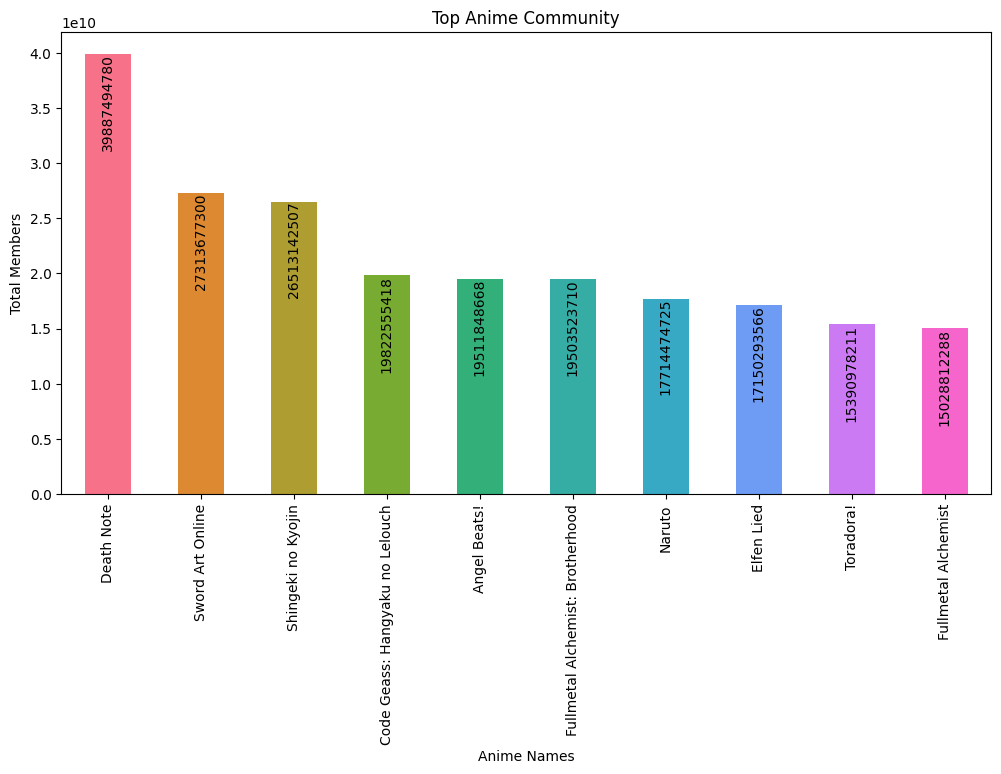

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by anime name and sum the total members
top_anime_community = merged_df.groupby('name')['members'].sum().sort_values(ascending=False).head(10)

# Get statistical information about the 'members' column
members_stats = merged_df['members'].describe()

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(top_anime_community))

# Plotting the bar chart with custom colors
plt.figure(figsize=(12, 6))
ax = top_anime_community.plot(kind='bar', color=custom_palette)
plt.title('Top Anime Community')
plt.xlabel('Anime Names')
plt.ylabel('Total Members')

# Annotate the bars with mean value
mean_value = members_stats['mean']
for i, v in enumerate(top_anime_community):
    ax.text(i, v + mean_value * 0.05, f'{v:.0f}',rotation=90 , color='black', ha='center', va='top')

plt.show()

In [26]:
# Display the top anime community information without visualization (optional)
# print("Top Anime Community:\n")
# print(top_anime_community)

### **Insights:**

- Death Note wears the crown for highest community members with 39887494780, followed by Sword Art Online with 27313677300 and Shingeki no Kyojin with 26513142507.

## 2. Anime Category


In [27]:
# Get the count of each unique anime category
anime_category_counts = merged_df['type'].value_counts()

anime_category_counts

TV         5283595
Movie      1051909
OVA         800307
Special     559347
ONA          91952
Music        26500
Name: type, dtype: int64

### **Insights:**

- TV: 5,283,595 TV shows
- Movie: 1,051,909 movies
- OVA (Original Video Animation): 800,307 OVAs
- Special: 559,347 special shows
- ONA (Original Net Animation): 91,952 ONAs
- Music: 26,500 music albums

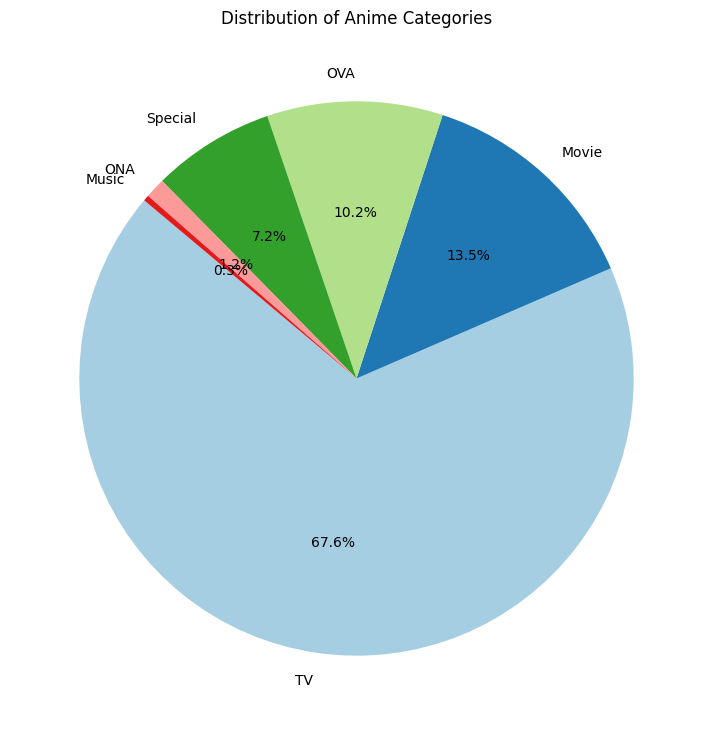

In [28]:
# Create a pie chart
plt.figure(figsize=(9, 9))
plt.pie(anime_category_counts, labels=anime_category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Anime Categories')
plt.show()

### **Insights:**

- TV: 67.6%
- Movie: 13.5%
- OVA (Original Video Animation): 10.2%
- Special: 7.2%
- ONA (Original Net Animation): 1.2%
- Musi: 0.3%


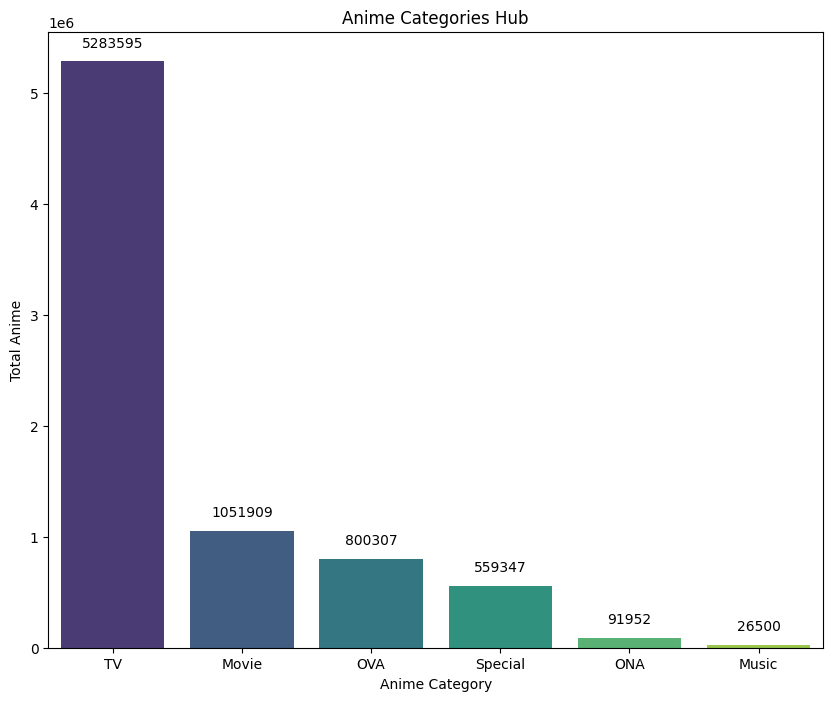

In [29]:
# Plotting the bar diagram
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=anime_category_counts.index, y=anime_category_counts.values, palette='viridis')
plt.title('Anime Categories Hub')
plt.xlabel('Anime Category')
plt.ylabel('Total Anime')

# Add value annotations on top of each bar
for i, v in enumerate(anime_category_counts.values):
    ax.text(i, v + 100000, str(v), color='black', ha='center', va='bottom')

plt.show()

### **Insights:**

- 5,283,595 animes are aired on TV, which is 67.6% of total animes.
- 1,051,909 animes are streamed as Movies, representing 13.5% of total animes.
- 800,307 animes are streamed as OVA (Original Video Animation), making up 10.2% of total animes.
- 559,347 animes fall under the category of Special, accounting for 7.2% of total animes.
- 91,952 animes are ONA (Original Net Animation), constituting 1.2% of total animes.
- 26,500 animes are categorized as Music, contributing 0.3% to the total nimes.


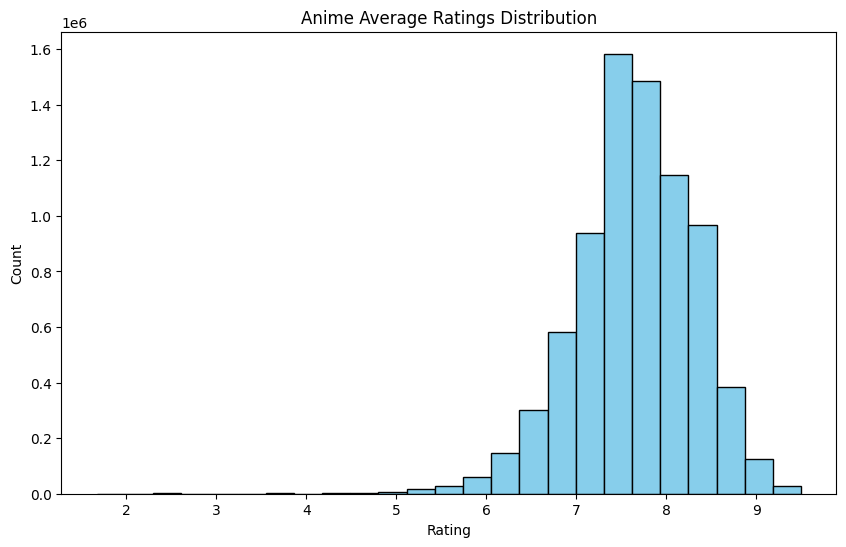

In [30]:
# Anime's average "rating" distribution
ratings = merged_df['rating']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=25, color='skyblue', edgecolor='black')
plt.title('Anime Average Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

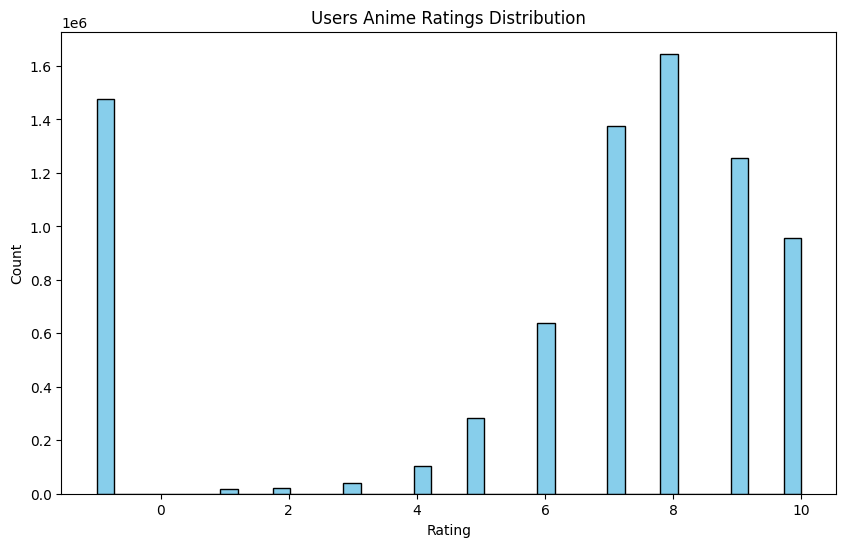

In [31]:
# Users Anime Ratings Distribution
ratings = merged_df['user_rating']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=40, color='skyblue', edgecolor='black')
plt.title('Users Anime Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Insights:

- Most of the Anime ratings are spread between 6.5 - 8.5.
- Most of the users' ratings are spread between 6.0 - 10.0.
- The mode of the users' ratings distribution is around 7.0 - 8.0.
- Both distributions are left-skewed.
- Users rating(-1) is an outlier in the ratings of users, which can be discarded.

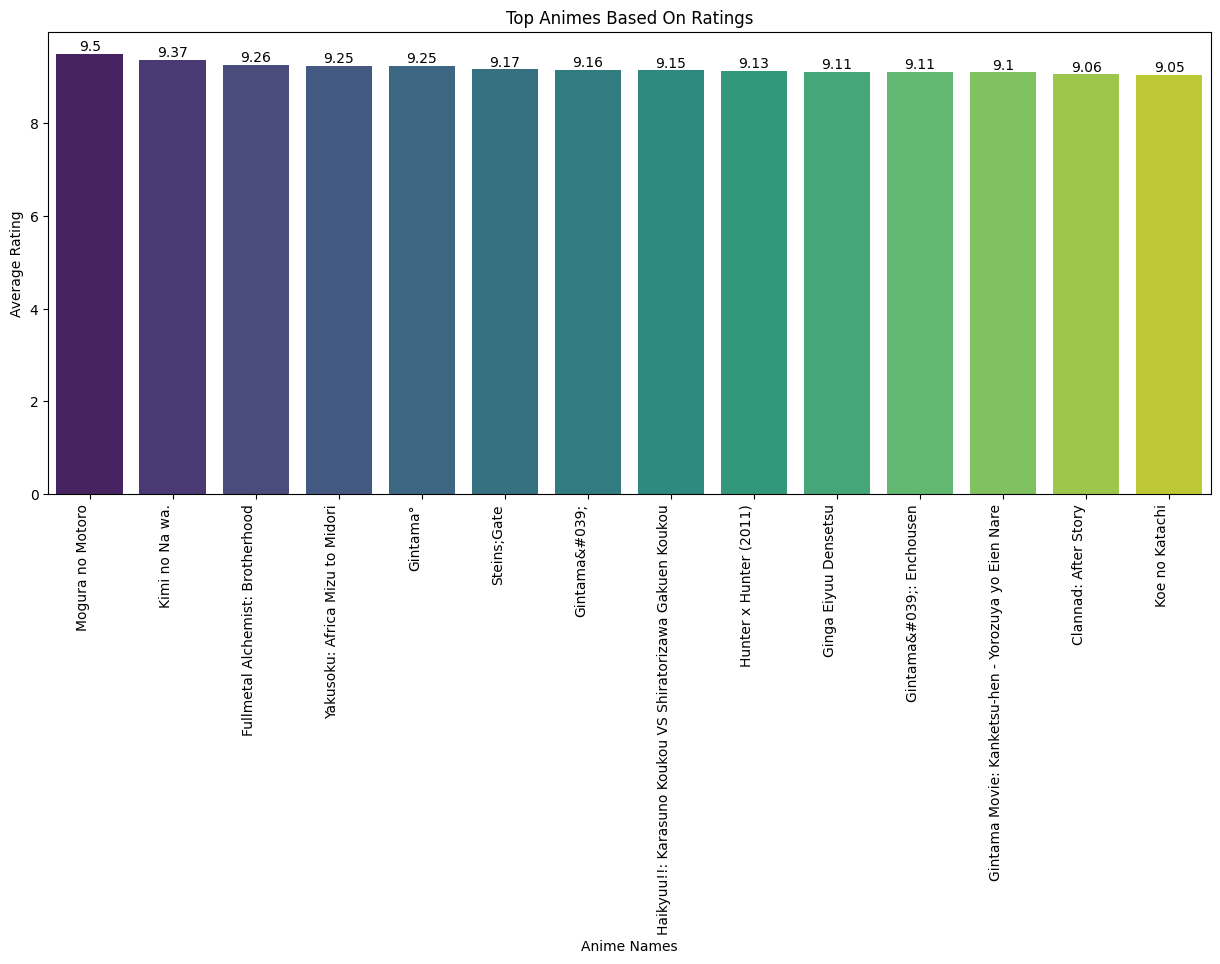

In [32]:
# Group by anime name and calculate the average rating
top_animes_ratings = merged_df.groupby('name')['rating'].mean().sort_values(ascending=False).head(14) # lets see 14 of em

# Plotting the bar chart using Seaborn
plt.figure(figsize=(15, 6))
bars = sns.barplot(x=top_animes_ratings.index, y=top_animes_ratings.values, palette='viridis')

# Display ratings inside the bars
for idx, bar in enumerate(bars.patches):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(top_animes_ratings.iloc[idx], 2), ha='center', va='bottom')

plt.title('Top Animes Based On Ratings')
plt.xlabel('Anime Names')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')
plt.show()

### Insights:

- *"Mogura no Motoro"* wears the crown for the highest rating.
- It is followed by *"Kimi no Na wa."* and *"Fullmetal Alchemist: Brotherhood."*

## 3. Lets explore Category-wise anime ratings

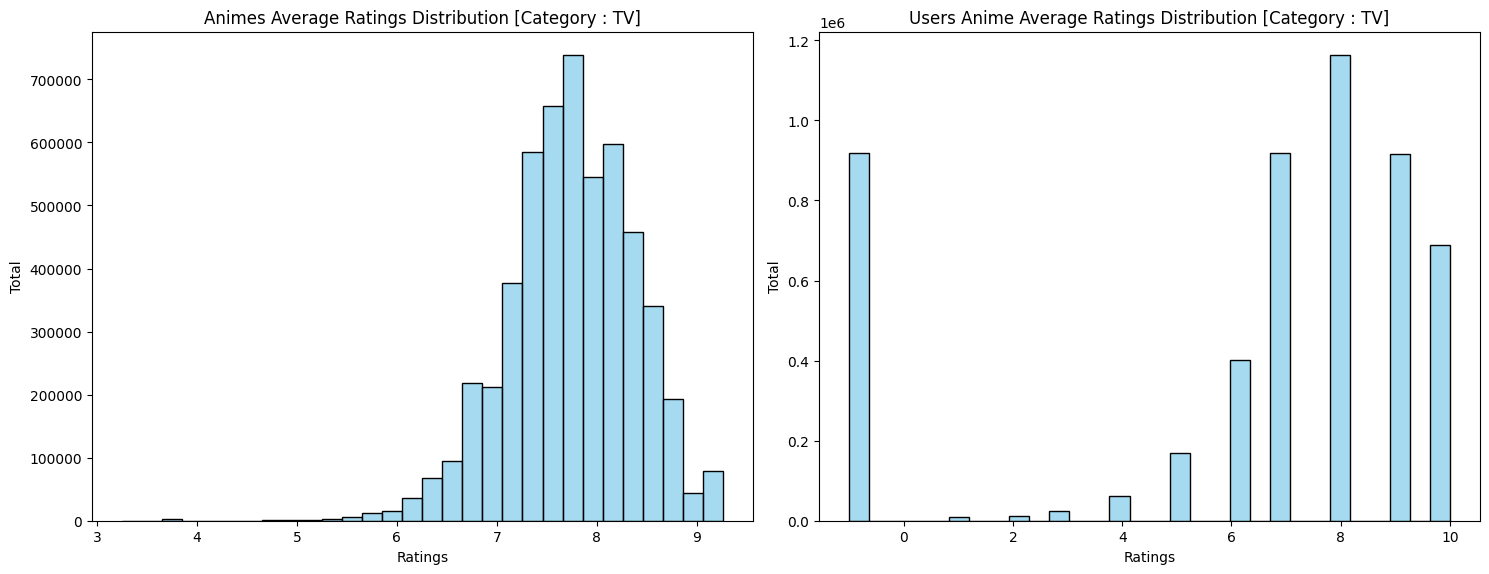

In [33]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Category-wise Anime Ratings Distribution - TV Category
tv_anime_ratings = merged_df[merged_df['type'] == 'TV']['rating']
sns.histplot(tv_anime_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Animes Average Ratings Distribution [Category : TV]')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Total')

# Category-wise Users Anime Ratings Distribution - TV Category
tv_user_ratings = merged_df[merged_df['type'] == 'TV']['user_rating']
sns.histplot(tv_user_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Users Anime Average Ratings Distribution [Category : TV]')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Total')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

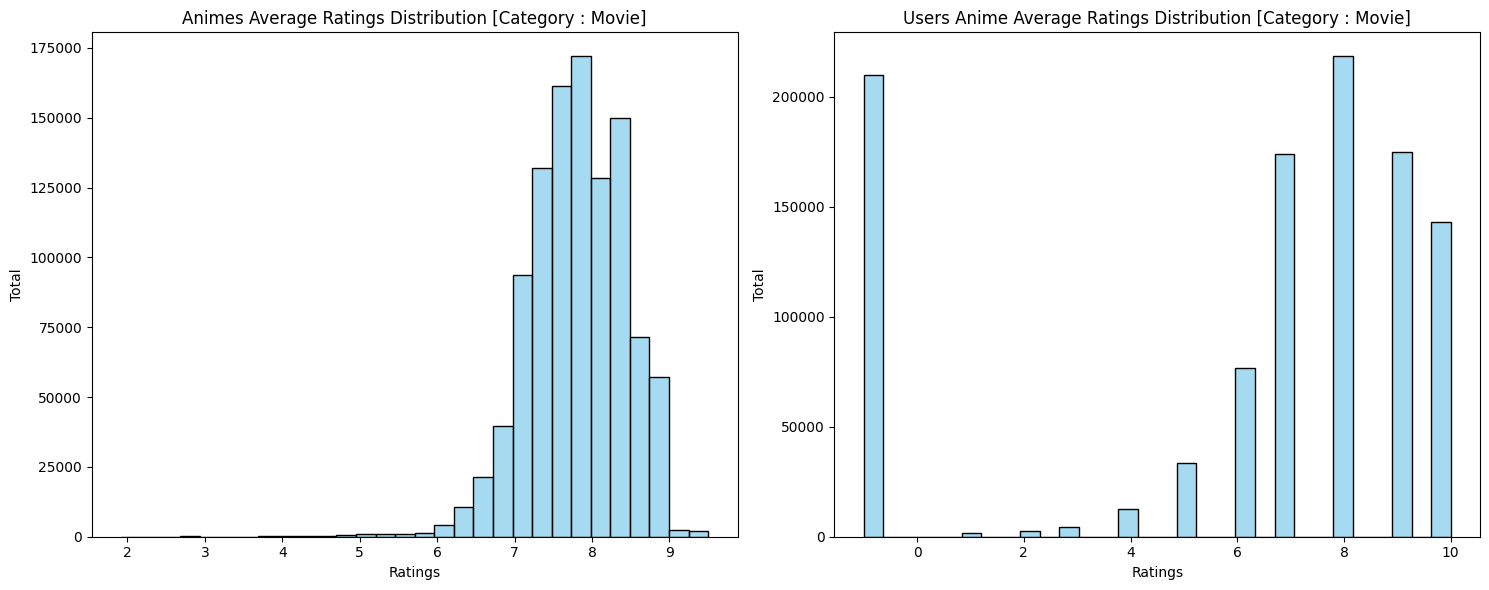

In [34]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Category-wise Anime Ratings Distribution - Movie Category
Movie_anime_ratings = merged_df[merged_df['type'] == 'Movie']['rating']
sns.histplot(Movie_anime_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Animes Average Ratings Distribution [Category : Movie]')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Total')

# Category-wise Users Anime Ratings Distribution - Movie Category
Movie_user_ratings = merged_df[merged_df['type'] == 'Movie']['user_rating']
sns.histplot(Movie_user_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Users Anime Average Ratings Distribution [Category : Movie]')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Total')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

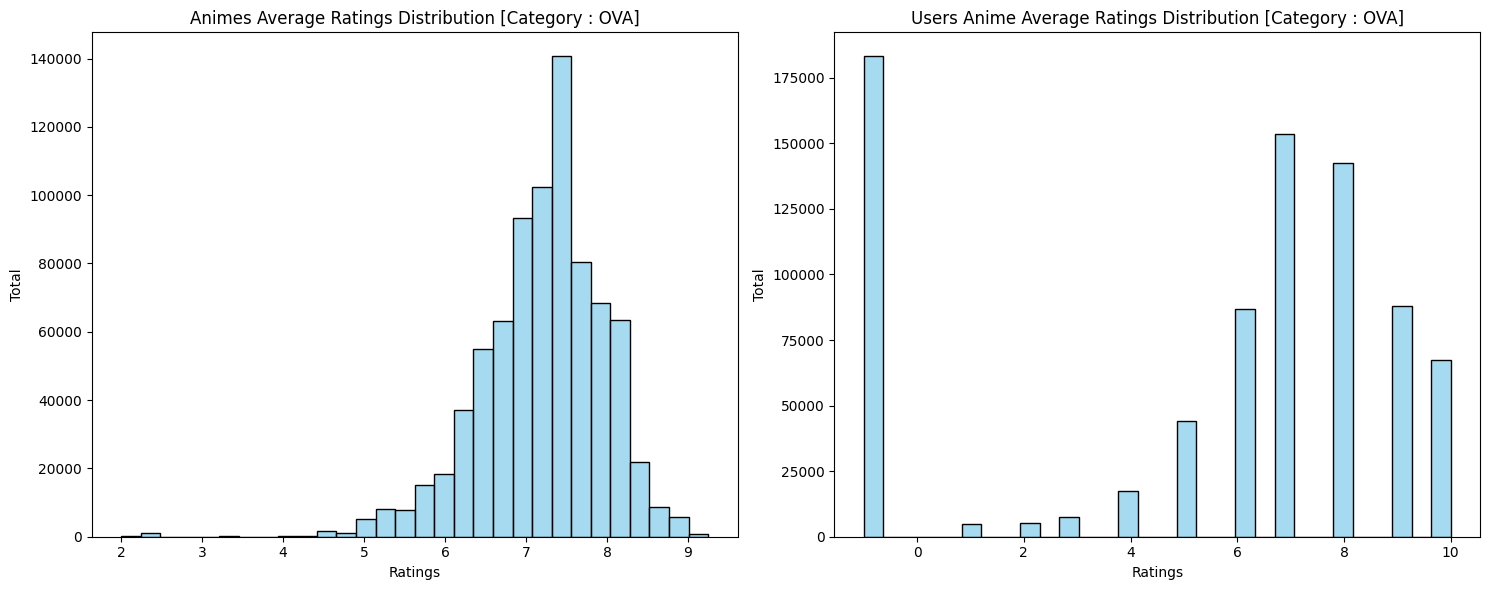

In [35]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Category-wise Anime Ratings Distribution - OVA Category
OVA_anime_ratings = merged_df[merged_df['type'] == 'OVA']['rating']
sns.histplot(OVA_anime_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Animes Average Ratings Distribution [Category : OVA]')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Total')

# Category-wise Users Anime Ratings Distribution - OVA Category
OVA_user_ratings = merged_df[merged_df['type'] == 'OVA']['user_rating']
sns.histplot(OVA_user_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Users Anime Average Ratings Distribution [Category : OVA]')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Total')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

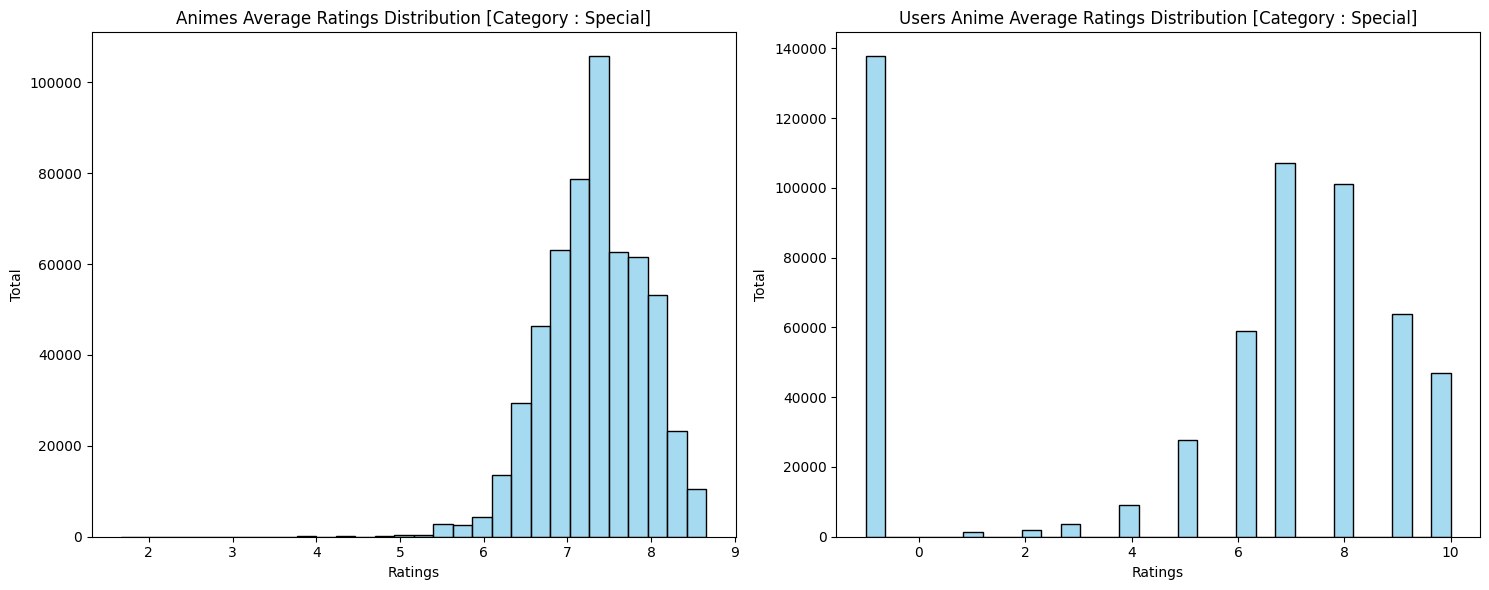

In [36]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Category-wise Anime Ratings Distribution - Special Category
special_anime_ratings = merged_df[merged_df['type'] == 'Special']['rating']
sns.histplot(special_anime_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Animes Average Ratings Distribution [Category : Special]')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Total')

# Category-wise Users Anime Ratings Distribution - Special Category
special_user_ratings = merged_df[merged_df['type'] == 'Special']['user_rating']
sns.histplot(special_user_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Users Anime Average Ratings Distribution [Category : Special]')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Total')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

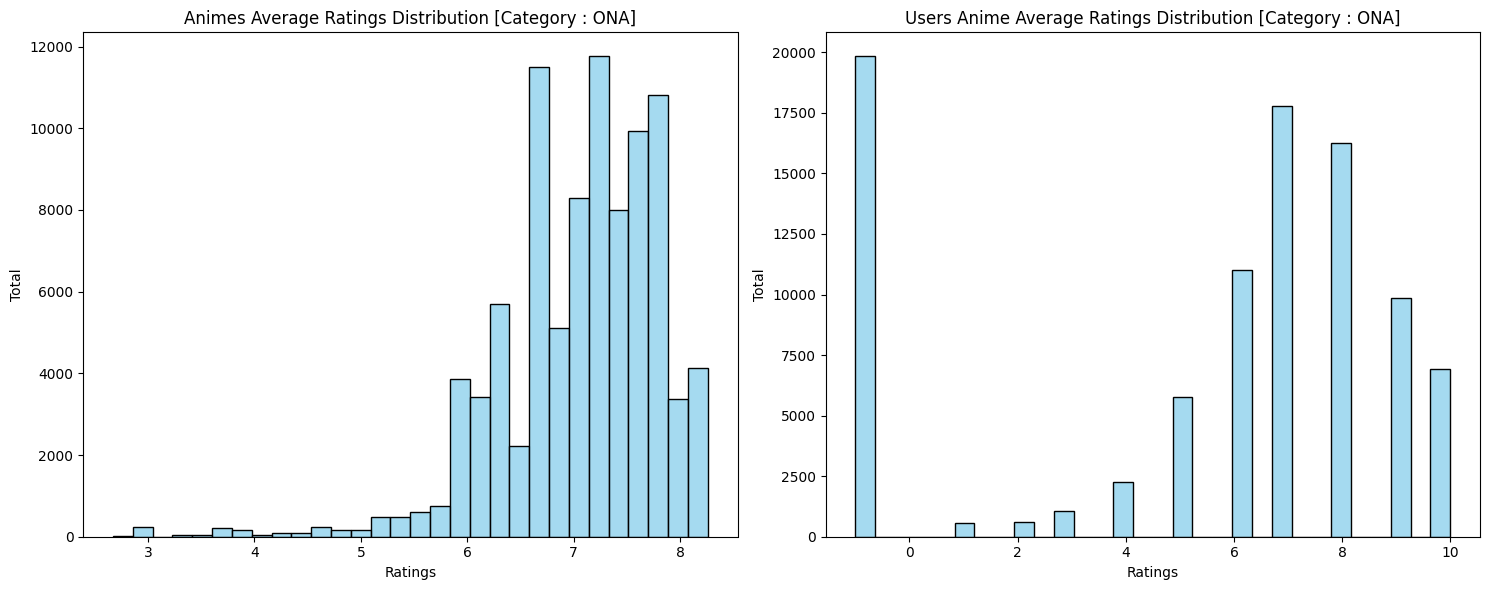

In [37]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Category-wise Anime Ratings Distribution - ONA Category
ONA_anime_ratings = merged_df[merged_df['type'] == 'ONA']['rating']
sns.histplot(ONA_anime_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Animes Average Ratings Distribution [Category : ONA]')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Total')

# Category-wise Users Anime Ratings Distribution - ONA Category
ONA_user_ratings = merged_df[merged_df['type'] == 'ONA']['user_rating']
sns.histplot(ONA_user_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Users Anime Average Ratings Distribution [Category : ONA]')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Total')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

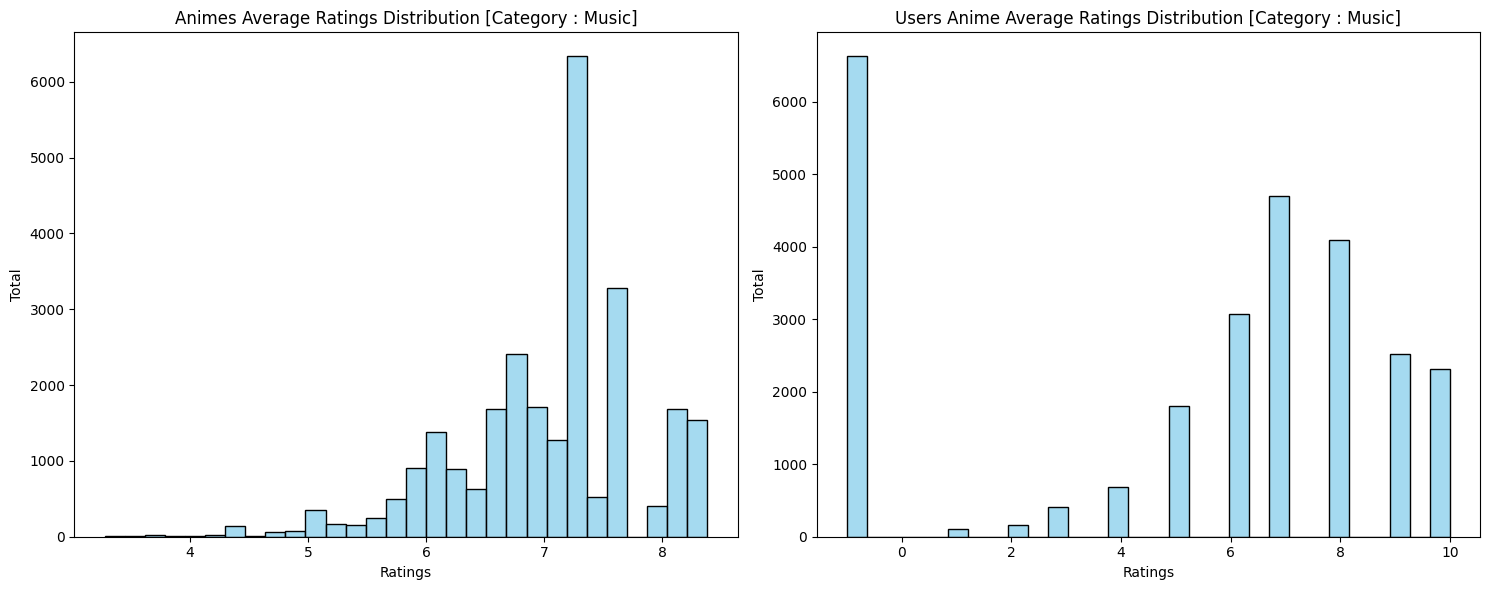

In [38]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Category-wise Anime Ratings Distribution - Music Category
music_anime_ratings = merged_df[merged_df['type'] == 'Music']['rating']
sns.histplot(music_anime_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Animes Average Ratings Distribution [Category : Music]')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Total')

# Category-wise Users Anime Ratings Distribution - Music Category
music_user_ratings = merged_df[merged_df['type'] == 'Music']['user_rating']
sns.histplot(music_user_ratings, bins=30, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('Users Anime Average Ratings Distribution [Category : Music]')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Total')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Anime Genres


In [39]:
unique_genres = set()

# Iterate through each row in the "genre" column
for genres in merged_df['genre']:
    # Split genres using comma as a separator
    genre_list = genres.split(', ')
    
    # Update the set of unique genres
    unique_genres.update(genre_list)

print("Total unique genres are: ", len(unique_genres))

print("Unique genres:\n", unique_genres)

Total unique genres are:  43
Unique genres:
 {'Shoujo Ai', 'Yuri', 'Supernatural', 'Music', 'Dementia', 'Magic', 'Slice of Life', 'Historical', 'Shounen', 'Sci-Fi', 'Drama', 'Seinen', 'Ecchi', 'Martial Arts', 'Military', 'Kids', 'Hentai', 'Horror', 'Police', 'Josei', 'Samurai', 'Thriller', 'Cars', 'Shoujo', 'Parody', 'School', 'Space', 'Harem', 'Yaoi', 'Demons', 'Mecha', 'Action', 'Fantasy', 'Sports', 'Shounen Ai', 'Romance', 'Comedy', 'Adventure', 'Psychological', 'Mystery', 'Super Power', 'Vampire', 'Game'}


# Final Data Preprocessing


In [40]:
data = merged_df.copy() # Creates a copy of the original DataFrame
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True) # Replaces all -1 values in "user_rating" with NaN(Not a Number)
data = data.dropna(axis = 0) # Drops rows containing NaN values
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"}) # result

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


**There are a lot of users who have rated only once, we consider users who have rated at least 50 animes, as users with fewer ratings may not provide valuable information for our recommendation system.**

In [41]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

**We will create a pivot table consists of "rows as title" and "columns as user_id", this will help us to create sparse matrix which can be very helpful in finding the similarity**

In [42]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**As we can see, there are many japanese or special character symbols in anime name. Let's remove those using "re" (Regular Expressions) package**

In [43]:
import re # Importing Regular Expressions

# text cleaning
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

# Applying text cleaning to japanese or special character in anime "name"
data["name"] = data["name"].apply(text_cleaning)

In [44]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)

print("After Cleaning the animes names, let's see how it looks like: \n")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like: 



user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Collaborative Recommender

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. We will use Cosine similarity which is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [45]:
# Importing necessary libraries for collaborative filtering
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Convert the pivot table into a sparse matrix for memory efficiency
data_matrix = csr_matrix(data_pivot.values)

# Create a Nearest Neighbors model using "cosine similarity" and the "brute force algorithm"
model_knn = NearestNeighbors(metric="cosine", algorithm="brute")
model_knn.fit(data_matrix)

# Choose a random anime title and find recommendations for it
query_no = np.random.choice(data_pivot.shape[0])
print(f"We will find a recommendation for anime {query_no}, which is {data_pivot.index[query_no]}.")

# Use the Nearest Neighbors model to find the nearest neighbors (similar animes) for the chosen anime
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no, :].values.reshape(1, -1), n_neighbors=6)

We will find a recommendation for anime 2429, which is Fuyu no Hi.


**Explanation:**

1. **Imported Libraries:**
   - `csr_matrix` for sparse matrices and `NearestNeighbors` for collaborative filtering.

2. **Converted to Sparse Matrix:**
   - Convert the pivot table into a sparse matrix using `csr_matrix`. This is done for memory efficiency, especially if the dataset is large.

3. **Nearest Neighbors Model:**
   - Created a Nearest Neighbors model (`model_knn`) using the `cosine similarity` metric and the `brute force algorithm`. This model will help find similar animes based on user preferences.

4. **Random Anime:**
   - Randomly choose an anime title (`query_no`) from the dataset for which recommendations will be generated.

5. **Find Recommendations:**
   - Use the Nearest Neighbors model to find the nearest neighbors (similar animes) for the chosen anime.
     - `distances` will contain the cosine distances between the chosen anime and its neighbors.
     - `indices` will contain the indices of the nearest neighbor animes.

In [46]:
no = []       # List to store recommendation numbers
name = []     # List to store anime names
distance = [] # List to store cosine distances
rating = []   # List to store ratings

# Loop through the distances and indices to gather recommendation information
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        # Uncomment the line below to print recommendations
        # print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")
        
        # Append information to lists for creating a DataFrame
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        
        # Extract and append the rating from the original anime dataset
        rating.append(*anime_df[anime_df["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

# Create a DataFrame with recommendation information
dic = {"No": no, "Anime Name": name, "Rating": rating}
recommendation = pd.DataFrame(data=dic)
recommendation.set_index("No", inplace=True)
recommendation.style.set_properties(**{"background-color": "#2a9d8f", "color": "white", "border": "1.5px solid black"})

Recommendations for Fuyu no Hi viewers :



,Anime Name,Rating
No,,
1,Fusha no Sha,6.730000
2,Doujouji,6.240000
3,Birthday Boy,6.210000
4,Kataku,6.380000
5,Tabi,5.530000


# Content Based Recommender

Content based filtering recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated which is then used to make suggestions for the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

**Term Frequency(TF) & Inverse Document Frequency(IDF)**

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).
Here we are going to use it on the genre of animes so that we can recommend contents to the users based on geres.


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer with specified settings
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words="english")

# Create a copy of the original DataFrame for recommendation data
rec_data = merged_df.copy()

# Remove duplicate anime names, keeping the first occurrence
rec_data.drop_duplicates(subset="name", keep="first", inplace=True)

# Reset the index after dropping duplicates
rec_data.reset_index(drop=True, inplace=True)

# Extract and preprocess genres from the "genre" column
genres = rec_data["genre"].str.split(", | , | ,").astype(str)

# Create a TF-IDF matrix for the genres using the Vectorizer
tfv_matrix = tfv.fit_transform(genres)

**Also, `scikit-learn` already provides pairwise metrics (a.k.a. kernels in machine learning) that work for both dense and sparse representations of vector collections. Here we need to assign `1 for recommended anime` and `0 for not recommended anime`. We will use sigmoid kernel here.**

In [48]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel for the TF-IDF matrix
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Create a Series with anime indices for recommendation lookup
rec_indices = pd.Series(rec_data.index, index=rec_data["name"]).drop_duplicates()

# Recommendation Function
def give_recommendation(title, sig=sig):
    # Get the index corresponding to the provided anime title
    idx = rec_indices[title]

    # Calculate pairwise similarity scores using sigmoid kernel
    sig_score = list(enumerate(sig[idx]))

    # Sort the similarity scores in descending order
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)

    # Keep the top 10 most similar animes (excluding itself)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]

    # Create a DataFrame with the top 10 similar animes
    rec_dic = {
        "No": range(1, 11),
        "Anime Name": anime_df["name"].iloc[anime_indices].values,
        "Rating": anime_df["rating"].iloc[anime_indices].values
    }
    dataframe = pd.DataFrame(data=rec_dic)
    dataframe.set_index("No", inplace=True)

    print(f"Recommendations for {title} viewers :\n")
    return dataframe.style.set_properties(**{"background-color": "#2a9d8f", "color": "white", "border": "1.5px solid black"})

# Anime Recommendation Engine

## Testing

In [49]:
give_recommendation("Death Note")

Recommendations for Death Note viewers :



,Anime Name,Rating
No,,
1,Hachimitsu to Clover Specials,7.850000
2,Trapp Ikka Monogatari,7.750000
3,Major S1,8.420000
4,Hakkenden: Touhou Hakken Ibun,7.570000
5,Ushi Atama,4.870000
6,ef: A Tale of Melodies.,8.180000
7,Saki Achiga-hen: Episode of Side-A Specials,7.630000
8,One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume!,7.430000
9,Kizumonogatari II: Nekketsu-hen,8.730000


In [50]:
give_recommendation("Kimi no Na wa.")

Recommendations for Kimi no Na wa. viewers :



,Anime Name,Rating
No,,
1,Densetsu Kyojin Ideon: Sesshoku-hen,6.370000
2,Mousou Kagaku Series: Wandaba Style,6.180000
3,Love Stage!!,7.690000
4,Hunter x Hunter: Greed Island,8.330000
5,Hataraku Maou-sama!,8.030000
6,Code Geass: Boukoku no Akito 4 - Nikushimi no Kioku Kara,7.550000
7,Danna ga Nani wo Itteiru ka Wakaranai Ken,7.550000
8,Qin Shiming Yue Zhi: Zhu Zi Bai Jia,7.490000
9,Saint Seiya: Tenkai-hen Josou - Overture,7.420000


In [51]:
give_recommendation("Fullmetal Alchemist: Brotherhood")

Recommendations for Fullmetal Alchemist: Brotherhood viewers :



,Anime Name,Rating
No,,
1,City Hunter 2,8.120000
2,Mahou Shoujo Lyrical Nanoha: The Movie 2nd A's,8.340000
3,Garo: Honoo no Kokuin,7.510000
4,Pankunchi,5.950000
5,Gunnm,7.260000
6,Binbougami ga!,7.880000
7,Bakegyamon,6.840000
8,Peeping Life Movie: We Are The Hero,5.100000
9,Angel Beats! Specials,7.790000


## Save the model

### 1. Using `pickle`

In [52]:
# import pickle

# # Save the anime_df file
# pickle.dump(anime_df.to_dict(),open('./animes_dict.pkl','wb'))
# # Save the TF-IDF Vectorizer
# pickle.dump(tfv,open('./tfidf_vectorizer.pkl','wb'))
# # Save the Sigmoid Kernel
# pickle.dump(sig, open('./sigmoid_kernel.pkl','wb'))

### ------ (OR) -------

### 2. Using `joblib`

In [53]:
import joblib

# Save the anime_df file
joblib.dump(anime_df.to_dict(), './animes_dict.joblib')
# Save the TF-IDF Vectorizer
joblib.dump(tfv, './tfidf_vectorizer.joblib')
# Save the Sigmoid Kernel
joblib.dump(sig, './sigmoid_kernel.joblib')

['./sigmoid_kernel.joblib']

# Thank you

If you enjoyed this notebook, please consider sharing it.

**Author:**

Sri Charan Thoutam
- 👉Shoot me mails : thoutamsricharan@gmail.com
- 👉Connect on LinkedIn: [linkedin.com/in/codewithcharan](https://www.linkedin.com/in/codewithcharan/)
- 👉Explore my Portfolio: [codewithcharan.github.io/My-Portfolio](https://codewithcharan.github.io/My-Portfolio/)
- 👉Explore my GitHub: [github.com/CodeWithCharan](https://github.com/CodeWithCharan)